# Dimension Reduction Method

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, average_precision_score

## Principal component analysis

PCA reduces the number of dimensions in large datasets to principal components that retain most of the original information. PCA tries to explain X best. 

In [27]:
from sklearn.decomposition import PCA

In [28]:
# Apply PCA
pca = PCA()  
X_pca = pca.fit_transform(X_scaled)

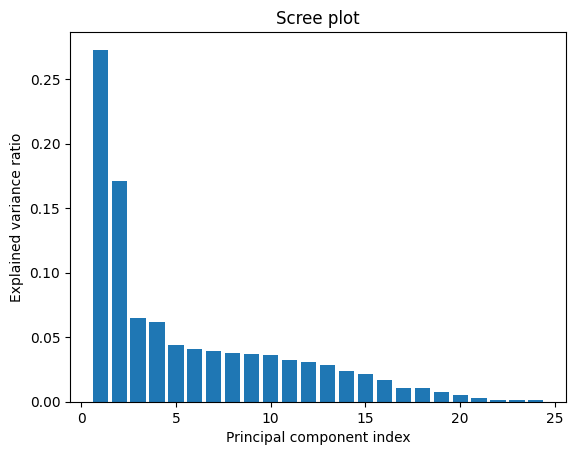

In [29]:
# Scree plot
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.title('Scree plot')
plt.show()

The elbow is at principal component index =2. So we retain the first two principal components. 

In [30]:
# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_[:2])

Explained variance ratio: [0.2726381  0.17083159]


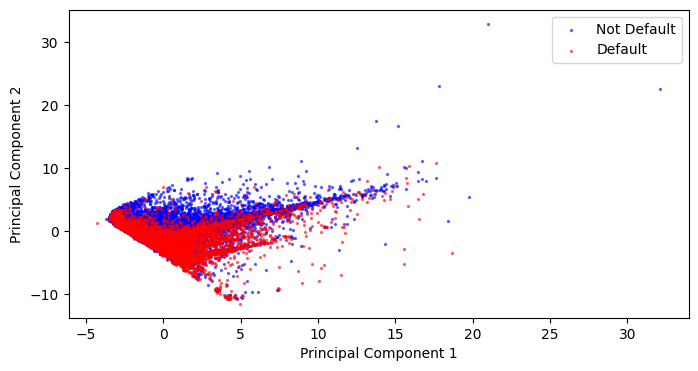

In [36]:
# Plot the PCA results
plt.figure(figsize=(8, 4))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='blue', label='Not Default', alpha=0.5, s=2)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='red', label='Default', alpha=0.5, s=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

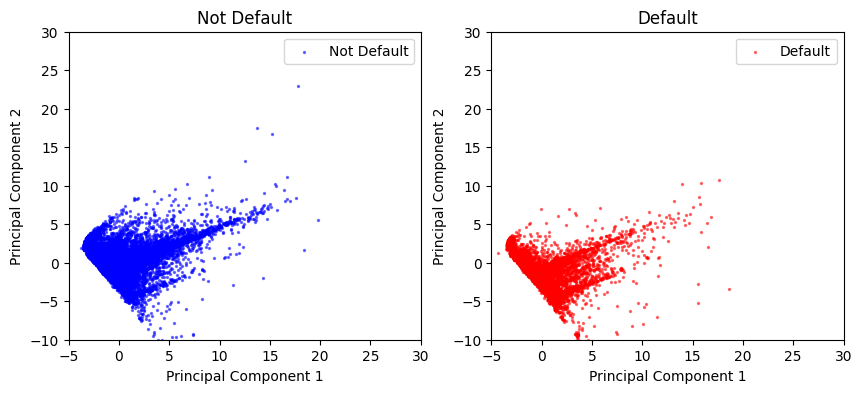

In [35]:
# Plot PCA results of twp groups in two graphs 

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.xlim(-5, 30)
plt.ylim(-10, 30)
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='blue', label='Not Default', alpha=0.5, s=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('Not Default')
plt.subplot(1, 2, 2)
plt.xlim(-5, 30)
plt.ylim(-10, 30)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='red', label='Default', alpha=0.5, s=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('Default')
plt.show()

In [ ]:
# save the first PCA components and target column as csv
df_pca = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])
df_pca['target'] = y
df_pca.to_csv('data/pca.csv', index=False)

## Partial least squares regression

PLS regression is generalizes and combines features from principal component analysis and multiple regression.

In [17]:
from sklearn.cross_decomposition import PLSRegression

In [19]:
# Apply Partial Least Squares (PLS)
pls = PLSRegression()
X_pls = pls.fit_transform(X_scaled, y)[0]

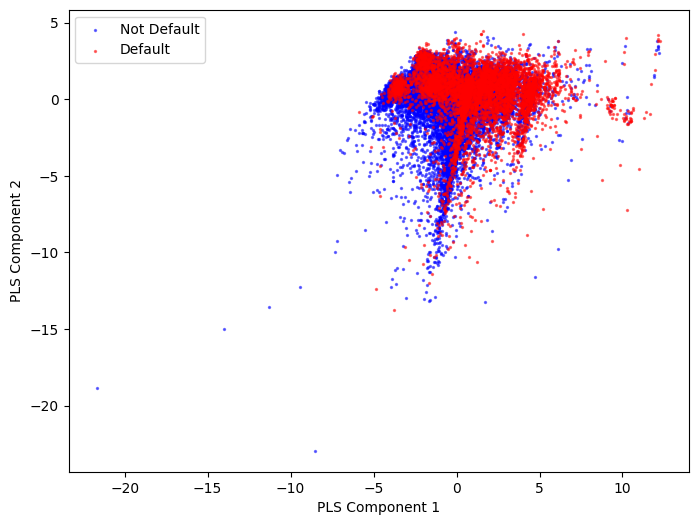

In [21]:
# Plot the PLS results
plt.figure(figsize=(8, 6))
plt.scatter(X_pls[y == 0, 0], X_pls[y == 0, 1], color='blue', label='Not Default', alpha=0.5, s=2)
plt.scatter(X_pls[y == 1, 0], X_pls[y == 1, 1], color='red', label='Default', alpha=0.5, s=2)
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.legend()
plt.show()